In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn import metrics

In [4]:
df=pd.read_csv('./hour.csv')

In [5]:
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [6]:
df.shape

(17379, 17)

In [7]:
df['season']=df.season.astype('category')
df['yr']=df.yr.astype('category')
df['mnth']=df.mnth.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weathersit']=df.weathersit.astype('category')

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Univariate

In [9]:
df['cnt']=np.where(df['cnt']>=200,1,0)
df.head()

instant      dteday season yr mnth  hr holiday weekday workingday  \
0        1  2011-01-01      1  0    1   0       0       6          0   
1        2  2011-01-01      1  0    1   1       0       6          0   
2        3  2011-01-01      1  0    1   2       0       6          0   
3        4  2011-01-01      1  0    1   3       0       6          0   
4        5  2011-01-01      1  0    1   4       0       6          0   

  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0          1  0.24  0.2879  0.81        0.0       3          13    0  
1          1  0.22  0.2727  0.80        0.0       8          32    0  
2          1  0.22  0.2727  0.80        0.0       5          27    0  
3          1  0.24  0.2879  0.75        0.0       3          10    0  
4          1  0.24  0.2879  0.75        0.0       0           1    0

In [10]:
df.loc[df['cnt']==1]

instant      dteday season yr mnth  hr holiday weekday workingday  \
85          86  2011-01-04      1  0    1  17       0       2          1   
122        123  2011-01-06      1  0    1   8       0       4          1   
145        146  2011-01-07      1  0    1   8       0       5          1   
239        240  2011-01-11      1  0    1   8       0       2          1   
285        286  2011-01-13      1  0    1   8       0       4          1   
...        ...         ...    ... ..  ...  ..     ...     ...        ...   
17367    17368  2012-12-31      1  1   12  12       0       1          1   
17368    17369  2012-12-31      1  1   12  13       0       1          1   
17369    17370  2012-12-31      1  1   12  14       0       1          1   
17370    17371  2012-12-31      1  1   12  15       0       1          1   
17371    17372  2012-12-31      1  1   12  16       0       1          1   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
85             1  0.28  0.2727  0.48     0.2239      10         202    1  
122            1  0.16  0.2273  0.59     0.0000       3         216    1  
145            1  0.20  0.1970  0.51     0.2537      20         190    1  
239            2  0.18  0.2121  0.51     0.0896       3         214    1  
285            1  0.14  0.1364  0.50     0.1940       5         197    1  
...          ...   ...     ...   ...        ...     ...         ...  ...  
17367          2  0.24  0.2273  0.56     0.1940      52         172    1  
17368          2  0.26  0.2576  0.44     0.1642      38         165    1  
17369          2  0.28  0.2727  0.45     0.2239      62         185    1  
17370          2  0.28  0.2879  0.45     0.1343      69         246    1  
17371          2  0.26  0.2576  0.48     0.1940      30         184    1  

[6616 rows x 17 columns]

In [12]:
df_greaterThan200=df.loc[df['cnt']==1]
df_lessThan200=df.loc[df['cnt']==0]
df_greaterThan200.shape

(6616, 17)

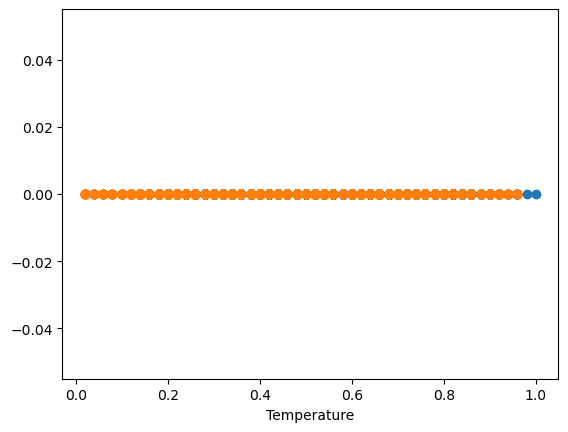

In [15]:
plt.plot(df_greaterThan200['temp'],np.zeros_like(df_greaterThan200['temp']),'o')
plt.plot(df_lessThan200['temp'],np.zeros_like(df_lessThan200['temp']),'o')
plt.xlabel('Temperature')
plt.show()

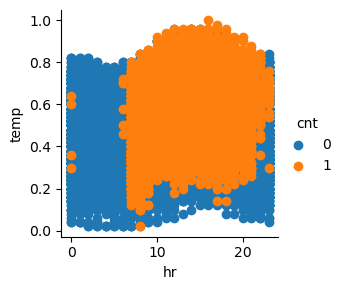

In [16]:
sns.FacetGrid(df,hue='cnt').map(plt.scatter,'hr','temp').add_legend()
plt.show()

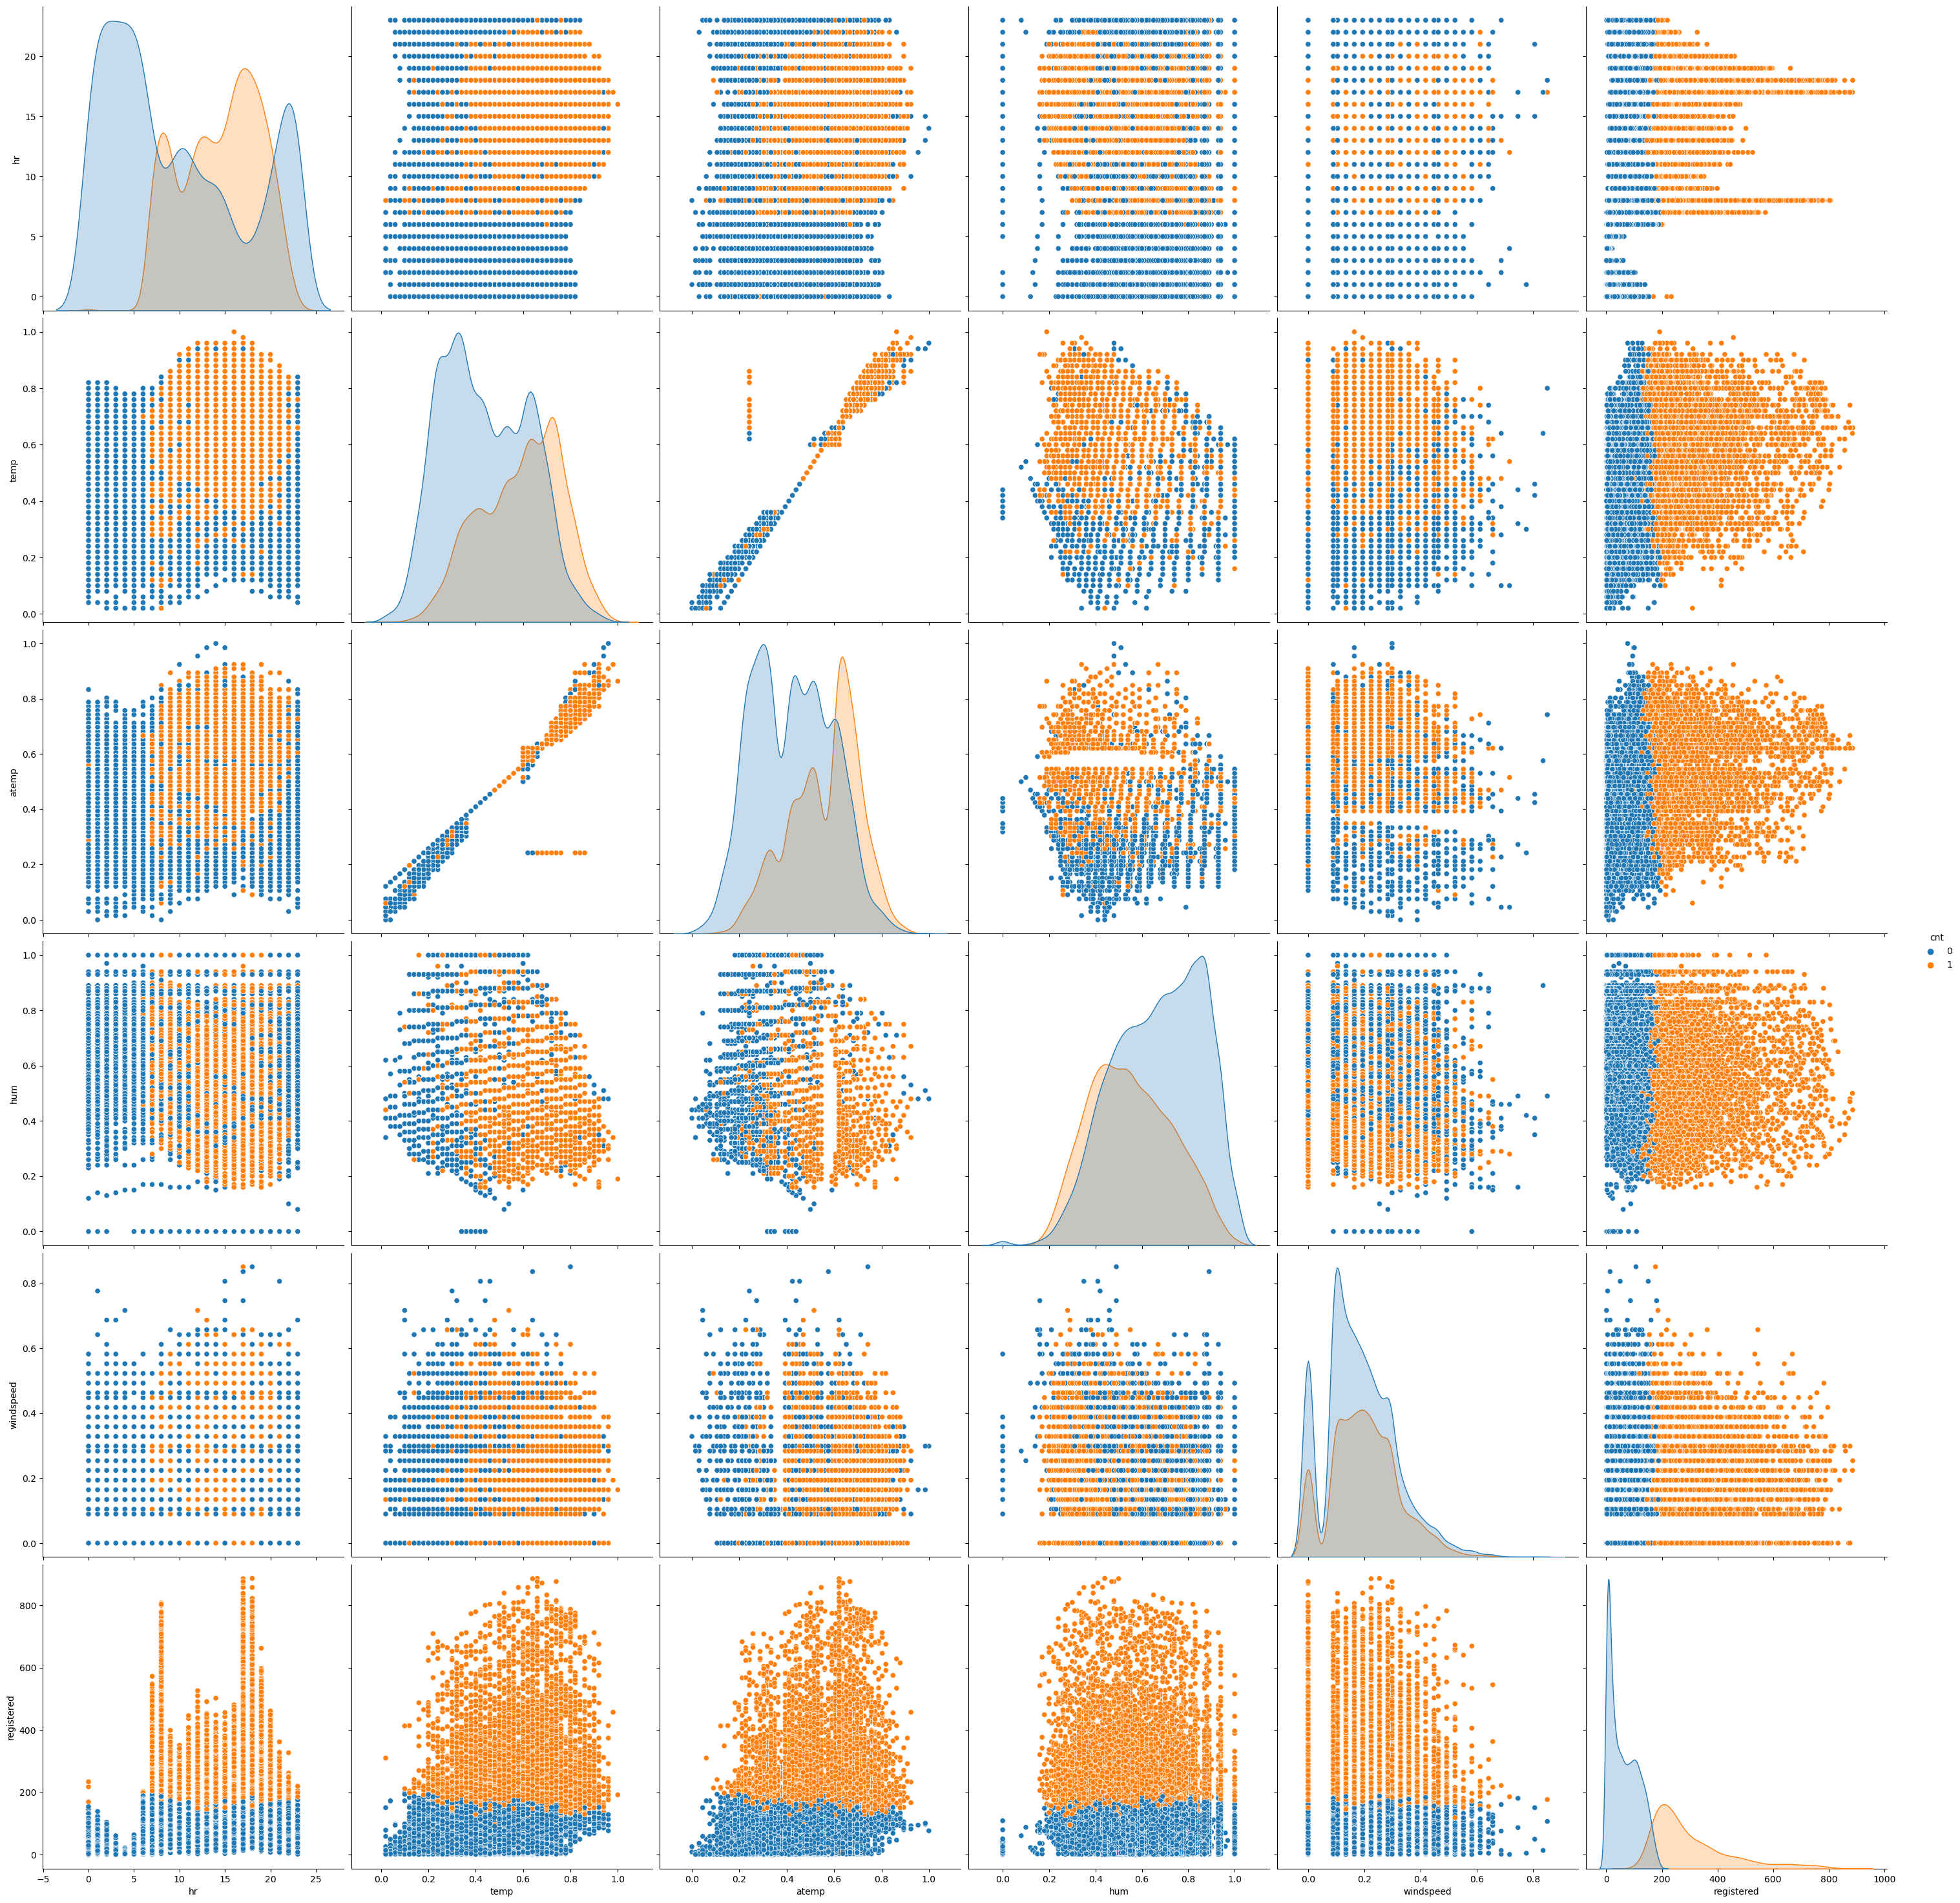

In [17]:
sns.pairplot(df[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','registered','cnt']],hue="cnt",height=5)

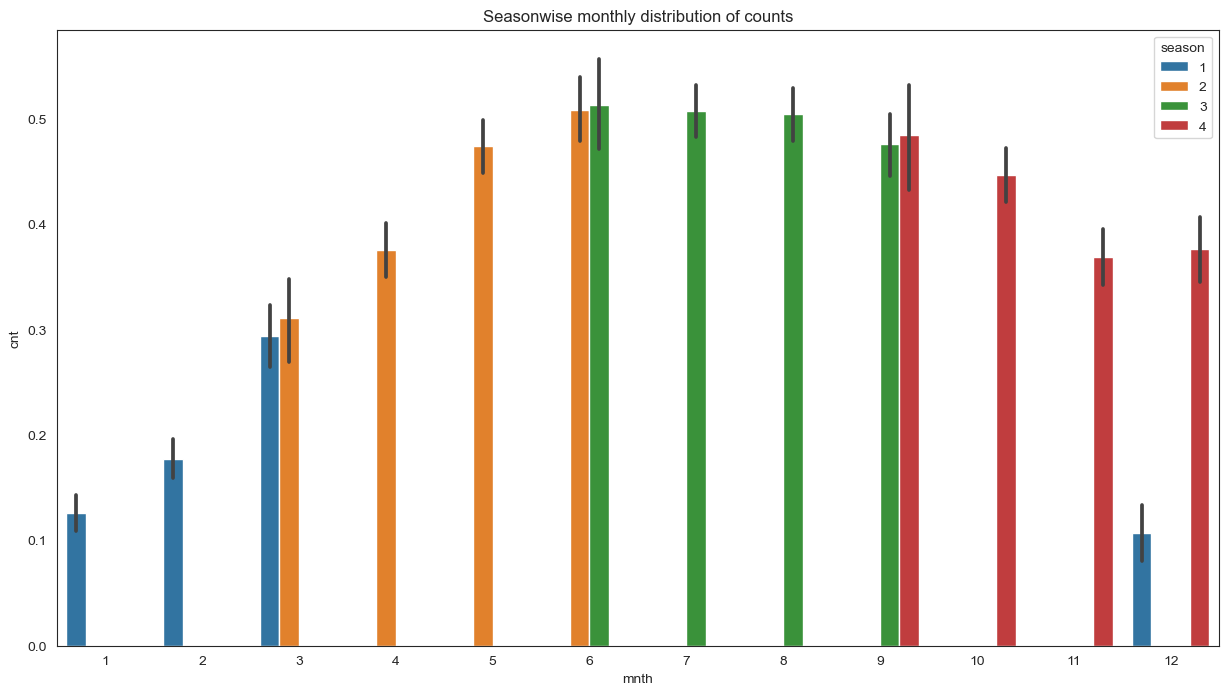

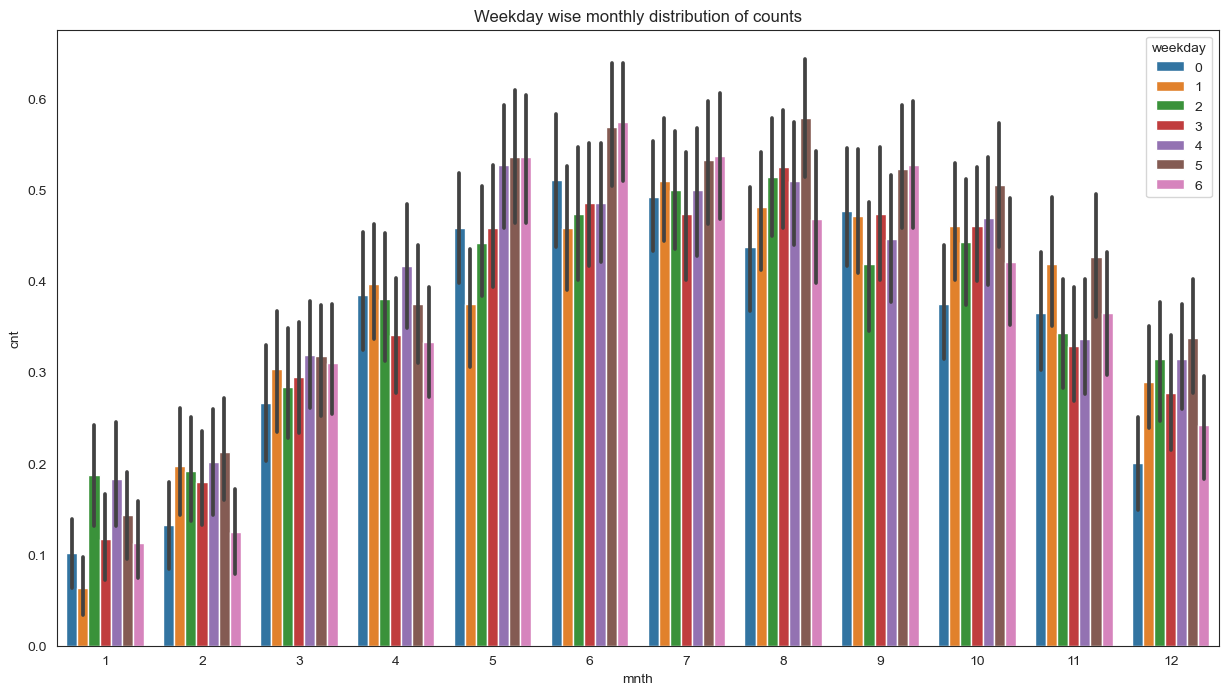

In [20]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

C:\Users\SOUVIK\AppData\Local\Temp\ipykernel_10192\3743154253.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correMtr=df[['season','mnth','hr','holiday','temp','hum','windspeed','casual','registered','cnt']].corr()


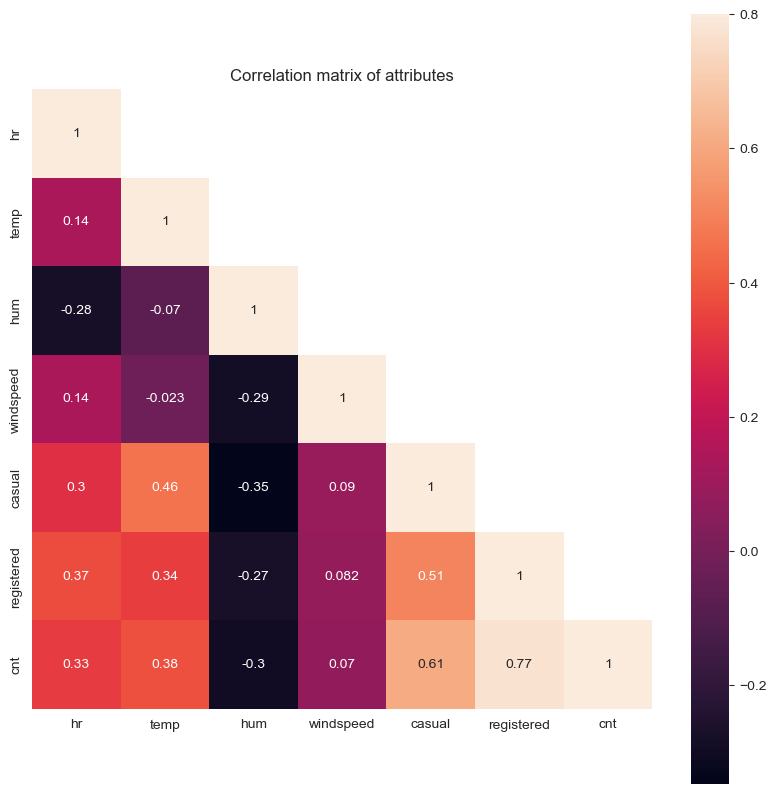

In [23]:
correMtr=df[['season','mnth','hr','holiday','temp','hum','windspeed','casual','registered','cnt']].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
flg,ax=plt.subplots(figsize=(10,10))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True)
ax.set_title('Correlation matrix of attributes')
plt.show()

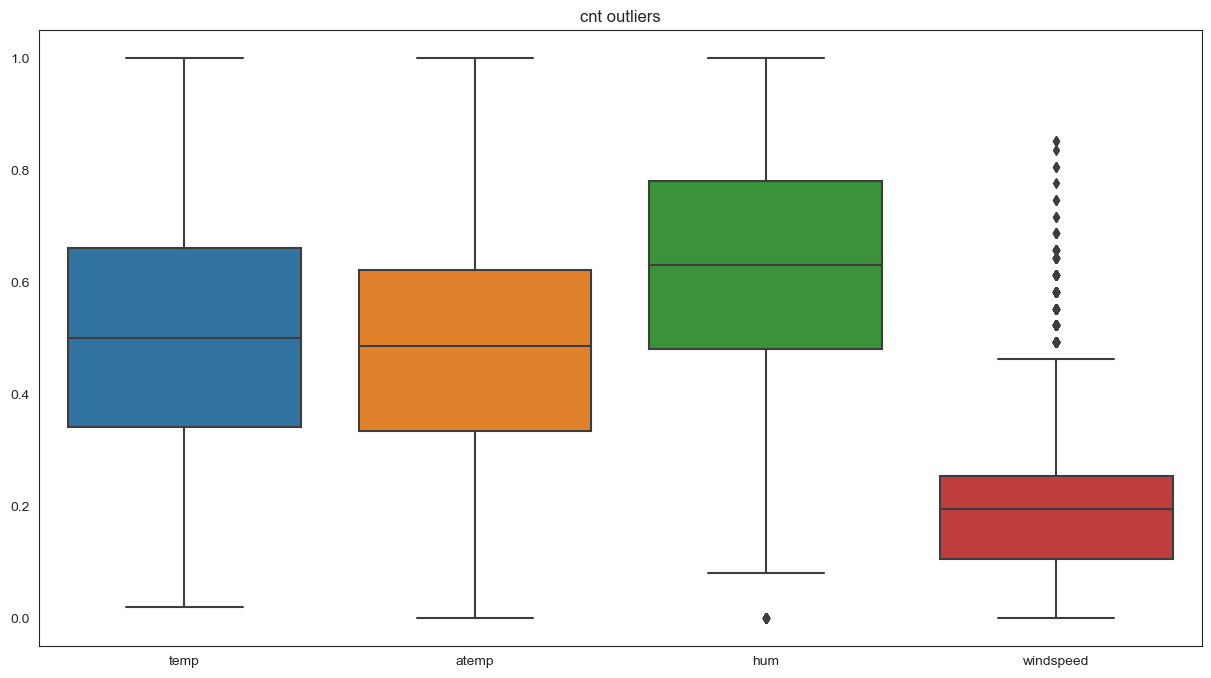

In [25]:
flg,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df[['temp','atemp','hum','windspeed']])
ax.set_title('cnt outliers')
plt.show()

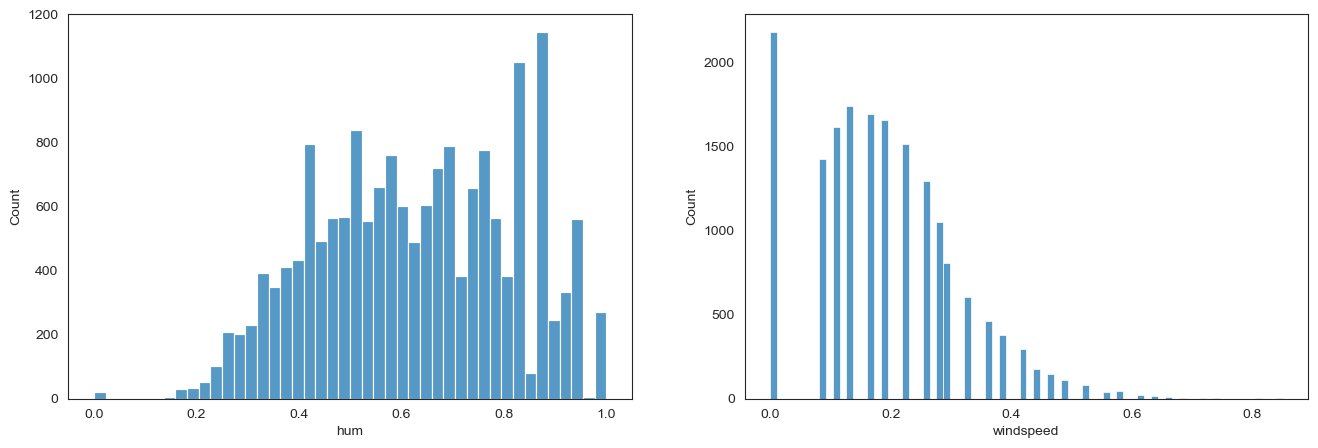

In [26]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['hum'])

plt.subplot(1,2,2)
sns.histplot(df['windspeed'])

plt.show()

In [27]:
df['windspeed'].describe()

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [32]:
#create dataframe for outliers
wind_hum=pd.DataFrame(df,columns=['windspeed','hum'])
 #Cnames for outliers                     
cnames=['windspeed','hum']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
wind_hum['hum']=wind_hum['hum'].fillna(wind_hum['hum'].mean())
#Replacing the imputated windspeed
df['windspeed']=df['windspeed'].replace(wind_hum['windspeed'])
#Replacing the imputated humidity
df['hum']=df['hum'].replace(wind_hum['hum'])
df.head(5)

instant      dteday season yr mnth  hr holiday weekday workingday  \
0        1  2011-01-01      1  0    1   0       0       6          0   
1        2  2011-01-01      1  0    1   1       0       6          0   
2        3  2011-01-01      1  0    1   2       0       6          0   
3        4  2011-01-01      1  0    1   3       0       6          0   
4        5  2011-01-01      1  0    1   4       0       6          0   

  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0          1  0.24  0.2879  0.81        0.0       3          13    0  
1          1  0.22  0.2727  0.80        0.0       8          32    0  
2          1  0.22  0.2727  0.80        0.0       5          27    0  
3          1  0.24  0.2879  0.75        0.0       3          10    0  
4          1  0.24  0.2879  0.75        0.0       0           1    0

In [39]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-3],df.iloc[:,-1],test_size=0.2, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(13903, 15) (3476, 15) (13903, 2) (3476, 2)
   index  cnt
0    335    0
1   7035    1
2   8051    0
3   2133    0
4   8485    0
   index  cnt
0  12830    1
1   8688    0
2   7091    0
3  12230    1
4    431    0


In [40]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','mnth','yr','weekday','holiday','workingday','weathersit','hum','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','mnth','yr','weekday','holiday','workingday','hum','temp','windspeed','weathersit']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weathersit','yr','mnth','weekday']
#numerical attributes
num_attributes=['temp','windspeed','hum']

In [41]:
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (13903, 36)


hum  temp  windspeed  season_1  season_2  season_3  season_4  holiday_0  \
0  0.55  0.20     0.2239         1         0         0         0          1   
1  0.42  0.52     0.1045         0         0         0         1          1   
2  0.80  0.46     0.2239         0         0         0         1          1   
3  0.31  0.46     0.0000         0         1         0         0          1   
4  0.75  0.20     0.1045         1         0         0         0          1   

   holiday_1  workingday_0  ...  mnth_10  mnth_11  mnth_12  weekday_0  \
0          0             1  ...        0        0        0          0   
1          0             0  ...        1        0        0          0   
2          0             0  ...        0        0        1          0   
3          0             1  ...        0        0        0          1   
4          0             1  ...        0        0        1          1   

   weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0          0          0          0          0          0          1  
1          0          1          0          0          0          0  
2          0          0          1          0          0          0  
3          0          0          0          0          0          0  
4          0          0          0          0          0          0  

[5 rows x 36 columns]

In [42]:
X_train=train_encoded_attributes
y_train=y_train.cnt.values
X_test=test_encoded_attributes
y_test=y_test.cnt.values

In [44]:
lr_model=linear_model.LogisticRegression()
lr_model.fit(X_train,y_train)
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.7599079335395238
Model coefficients : [[-3.9266328   7.24312144  0.10858062 -0.51275563  0.08526663 -0.13892024
   0.53436661  0.14976907 -0.18181171 -0.06377913  0.03173649  0.03929702
   0.24701714 -0.21059202 -0.10776478 -0.53894256  0.50689992  0.4540154
   0.32007513  0.36502563 -0.12122543 -0.01766261 -0.79252193 -1.07831181
  -0.59088791  0.03315276  0.24035756  0.4201075   0.73583307 -0.01474194
  -0.0833949  -0.09424261 -0.09642442 -0.06029007  0.18427678  0.13277451]]
Model intercept value : [-2.03532902]


D:\Users\SOUVIK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.metrics import confusion_matrix
y_pred=lr_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[1865,  344],
       [ 481,  786]], dtype=int64)

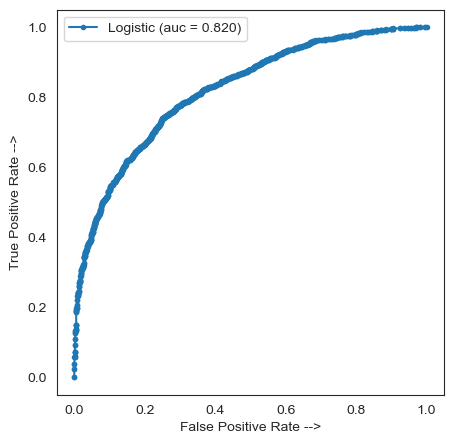

In [49]:
from sklearn.metrics import roc_curve, auc

y_pred_logistic = lr_model.decision_function(X_test)
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel ('False Positive Rate -->') 
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()